<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/ARIMA_Oil_%26_Currency_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pmdarima

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df_USD_EUR=pd.read_csv('/content/drive/MyDrive/dissertation/df_USD_EUR.csv')
df_USD_EUR['Date'] = pd.to_datetime(df_USD_EUR['Date'])

df_USD_EUR=df_USD_EUR.set_index('Date')
df_USD_EUR

,Original_USD_EUR_Price
Date,
2020-01-02,1.122083
2020-01-03,1.117144
2020-01-06,1.116196
2020-01-07,1.119799
2020-01-08,1.115474
...,...
2023-06-27,1.091048
2023-06-28,1.095722
2023-06-29,1.091584


In [20]:
df_USD_EUR['Original_USD_EUR_Price_Pct_Change']=df_USD_EUR['Original_USD_EUR_Price'].pct_change()
df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff']=df_USD_EUR['Original_USD_EUR_Price'].pct_change().diff()

In [21]:
df_Oil_InUSD=pd.read_csv('/content/drive/MyDrive/dissertation/df_Oil_InUSD.csv')
df_Oil_InUSD['Date'] = pd.to_datetime(df_Oil_InUSD['Date'])

df_Oil_InUSD=df_Oil_InUSD.set_index('Date')
df_Oil_InUSD

,Original_Oil_Price
Date,
2020-01-02,67.12
2020-01-03,69.38
2020-01-06,70.87
2020-01-07,69.60
2020-01-08,69.58
...,...
2023-06-27,75.15
2023-06-28,74.38
2023-06-29,74.34


In [22]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")



In [23]:
df_Oil_InUSD['Original_Oil_Price_Pct_Change']=df_Oil_InUSD['Original_Oil_Price'].pct_change()
df_Oil_InUSD['Original_Oil_Price_Pct_Change_diff']=df_Oil_InUSD['Original_Oil_Price'].pct_change().diff()

In [24]:
perform_adfuller(df_Oil_InUSD['Original_Oil_Price_Pct_Change_diff'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -11.917267270567047
P-value: 5.129762531736788e-22
The time series is stationary.


In [25]:
perform_adfuller(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -13.10310769325714
P-value: 1.6939020857387613e-24
The time series is stationary.


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()


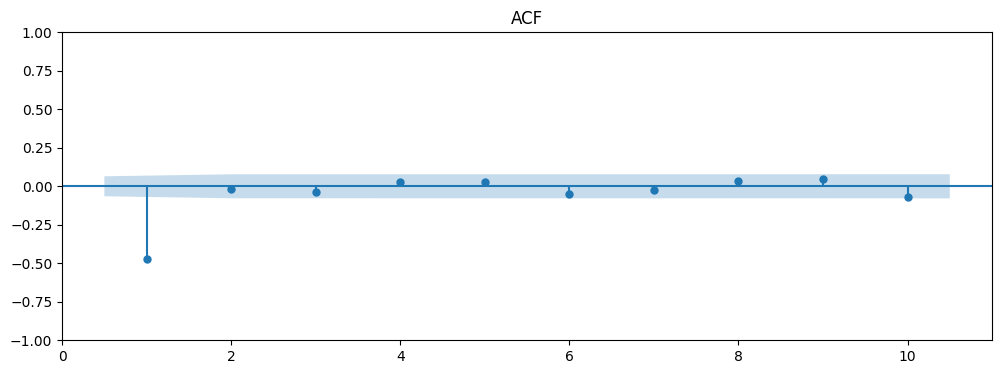

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


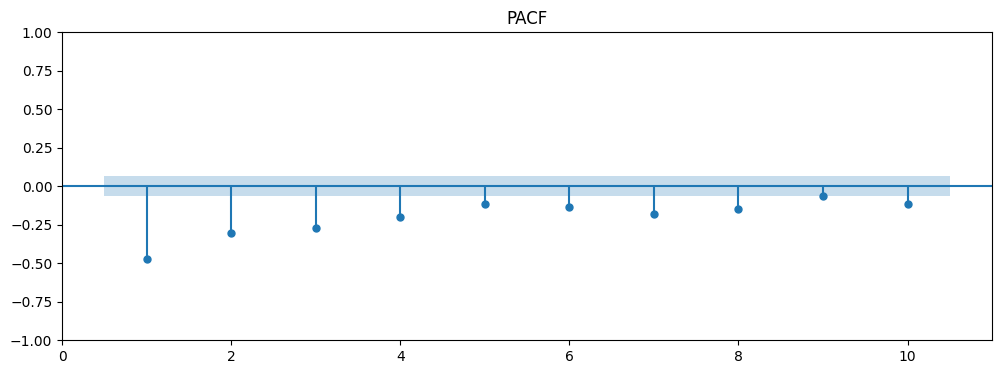

In [29]:
plot_acf_values(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), lags=10)
plot_pacf_values(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), lags=10)


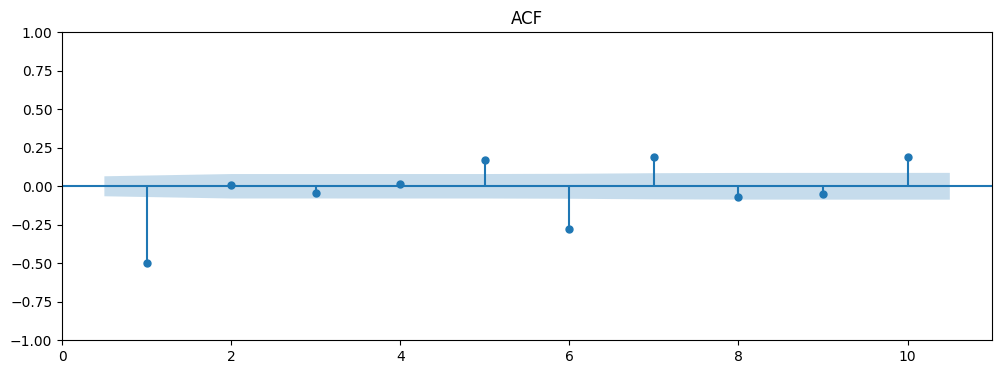

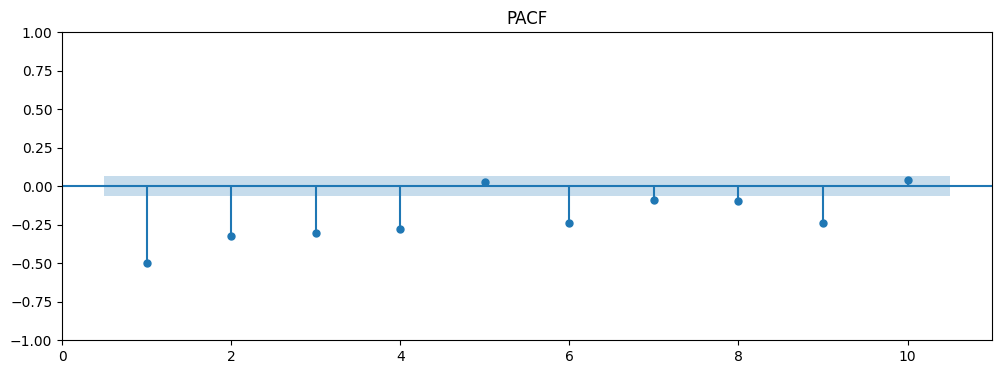

In [31]:
plot_acf_values(df_Oil_InUSD['Original_Oil_Price_Pct_Change_diff'].dropna(), lags=10)
plot_pacf_values(df_Oil_InUSD['Original_Oil_Price_Pct_Change_diff'].dropna(), lags=10)


In [32]:
# Define the start and end dates for train and test data
train_start_date = pd.to_datetime('2018-01-01')
train_end_date = pd.to_datetime('2022-12-31')
test_start_date = pd.to_datetime('2023-01-01')


In [33]:
df_USD_EUR=df_USD_EUR[df_USD_EUR.index>='2020-01-01']
df_USD_EUR

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff
Date,,,
2020-01-02,1.122083,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN
2020-01-06,1.116196,-0.000848,0.003553
2020-01-07,1.119799,0.003228,0.004077
2020-01-08,1.115474,-0.003863,-0.007091
...,...,...,...
2023-06-27,1.091048,0.000349,0.005115
2023-06-28,1.095722,0.004284,0.003935
2023-06-29,1.091584,-0.003777,-0.008061


In [34]:
train_data_currency = df_USD_EUR[(df_USD_EUR.index >= train_start_date) & (df_USD_EUR.index <= train_end_date)]
test_data_currency = df_USD_EUR[df_USD_EUR.index >= test_start_date]
train_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff
Date,,,
2020-01-02,1.122083,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN
2020-01-06,1.116196,-0.000848,0.003553
2020-01-07,1.119799,0.003228,0.004077
2020-01-08,1.115474,-0.003863,-0.007091


In [35]:
df_Oil_InUSD=df_Oil_InUSD[df_Oil_InUSD.index>='2020-01-01']
df_Oil_InUSD

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff
Date,,,
2020-01-02,67.12,NaN,NaN
2020-01-03,69.38,0.033671,NaN
2020-01-06,70.87,0.021476,-0.012195
2020-01-07,69.60,-0.017920,-0.039396
2020-01-08,69.58,-0.000287,0.017633
...,...,...,...
2023-06-27,75.15,0.006698,-0.000181
2023-06-28,74.38,-0.010246,-0.016944
2023-06-29,74.34,-0.000538,0.009708


In [36]:
train_data_oil = df_Oil_InUSD[(df_Oil_InUSD.index >= train_start_date) & (df_Oil_InUSD.index <= train_end_date)]
test_data_oil = df_Oil_InUSD[df_Oil_InUSD.index >= test_start_date]
train_data_oil.head(5)

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff
Date,,,
2020-01-02,67.12,NaN,NaN
2020-01-03,69.38,0.033671,NaN
2020-01-06,70.87,0.021476,-0.012195
2020-01-07,69.60,-0.017920,-0.039396
2020-01-08,69.58,-0.000287,0.017633


In [37]:
import warnings
warnings.filterwarnings("ignore")


In [40]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model_fit(dataframe, p, d, q, exog=None):
    model = ARIMA(dataframe, order=(p,d,q), exog=exog)
    model_fit = model.fit()
    return model_fit

#Oil Model Fitting

In [42]:
oil_model_fit=arima_model_fit(train_data_oil['Original_Oil_Price_Pct_Change_diff'],5,0,3)
oil_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Original_Oil_Price_Pct_Change_diff   No. Observations:                  782
Model:                                 ARIMA(5, 0, 3)   Log Likelihood                1536.069
Date:                                Wed, 05 Jul 2023   AIC                          -3052.138
Time:                                        07:39:21   BIC                          -3005.519
Sample:                                    01-02-2020   HQIC                         -3034.210
                                         - 12-30-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.016e-06      0.000     -0.009      0.993      -0.000       0.000
ar.L1         -1.4157      0.032    -44.179      0.000      -1.479      -1.353
ar.L2         -0.9256      0.060    -15.467      0.000      -1.043      -0.808
ar.L3         -0.2255      0.065     -3.443      0.001      -0.354      -0.097
ar.L4         -0.1576      0.047     -3.322      0.001      -0.251      -0.065
ar.L5          0.0517      0.026      1.965      0.049       0.000       0.103
ma.L1          0.5329      0.026     20.331      0.000       0.482       0.584
ma.L2         -0.4233      0.026    -16.037      0.000      -0.475      -0.372
ma.L3         -0.7832      0.022    -36.259      0.000      -0.826      -0.741
sigma2         0.0011   2.09e-05     54.374      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             10580.21
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

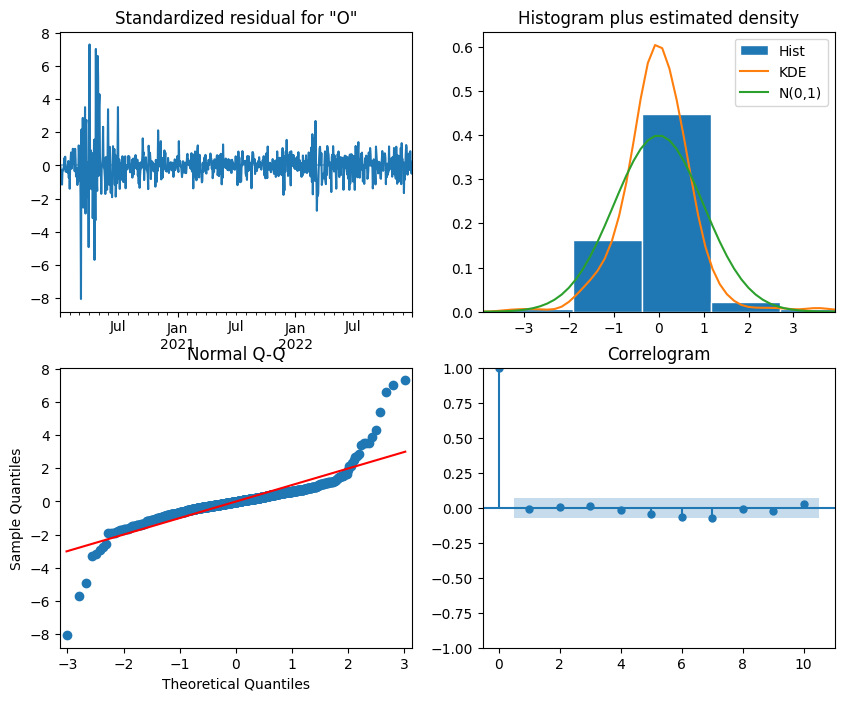

In [43]:
oil_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


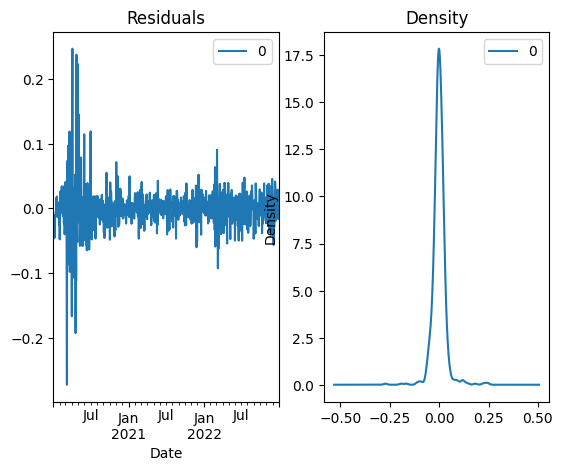

In [44]:
# Plot residual errors
residuals = pd.DataFrame(oil_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [45]:
# Get in-sample predictions
testing_data_forecast = oil_model_fit.get_forecast(steps=len(test_data_oil), alpha=0.05)

test_data_oil[['lower Oil predictions','Higher Oil predictions']] = testing_data_forecast.conf_int()

# Create a new column for the predicted values
test_data_oil['Oil predictions'] = testing_data_forecast.predicted_mean
test_data_oil

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff,lower Oil predictions,Higher Oil predictions,Oil predictions
Date,,,,,,
2023-01-02,82.05,0.009349,-0.001846,-0.075019,0.057224,-0.008898
2023-01-03,82.05,0.000000,-0.009349,-0.090847,0.085557,-0.002645
2023-01-04,76.88,-0.063010,-0.063010,-0.086839,0.090051,0.001606
2023-01-05,75.77,-0.014438,0.048572,-0.091937,0.085083,-0.003427
2023-01-06,76.15,0.005015,0.019453,-0.082621,0.096478,0.006929
...,...,...,...,...,...,...
2023-06-27,75.15,0.006698,-0.000181,-0.096523,0.096479,-0.000022
2023-06-28,74.38,-0.010246,-0.016944,-0.096488,0.096513,0.000013
2023-06-29,74.34,-0.000538,0.009708,-0.096504,0.096497,-0.000004


#Currency Model Fitting

In [46]:
cur_model_fit=arima_model_fit(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna(),1,0,2,exog=train_data_oil['Original_Oil_Price_Pct_Change_diff'].dropna())
cur_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:     Original_USD_EUR_Price_Pct_Change_diff   No. Observations:                  780
Model:                                     ARIMA(1, 0, 2)   Log Likelihood                2995.857
Date:                                    Wed, 05 Jul 2023   AIC                          -5979.713
Time:                                            07:39:26   BIC                          -5951.757
Sample:                                        01-06-2020   HQIC                         -5968.961
                                             - 12-30-2022                                         
Covariance Type:                                      opg                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -6.384e-07   4.32e-05     -0.015      0.988   -8.53e-05     8.4e-05
Original_Oil_Price_Pct_Change_diff    -0.0129      0.004     -3.113      0.002      -0.021      -0.005
ar.L1                                 -0.7792      0.313     -2.493      0.013      -1.392      -0.167
ma.L1                                  0.0318      0.304      0.105      0.917      -0.563       0.627
ma.L2                                 -0.6193      0.223     -2.773      0.006      -1.057      -0.182
sigma2                              2.688e-05   1.11e-06     24.241      0.000    2.47e-05    2.91e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.55   Jarque-Bera (JB):                47.55
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

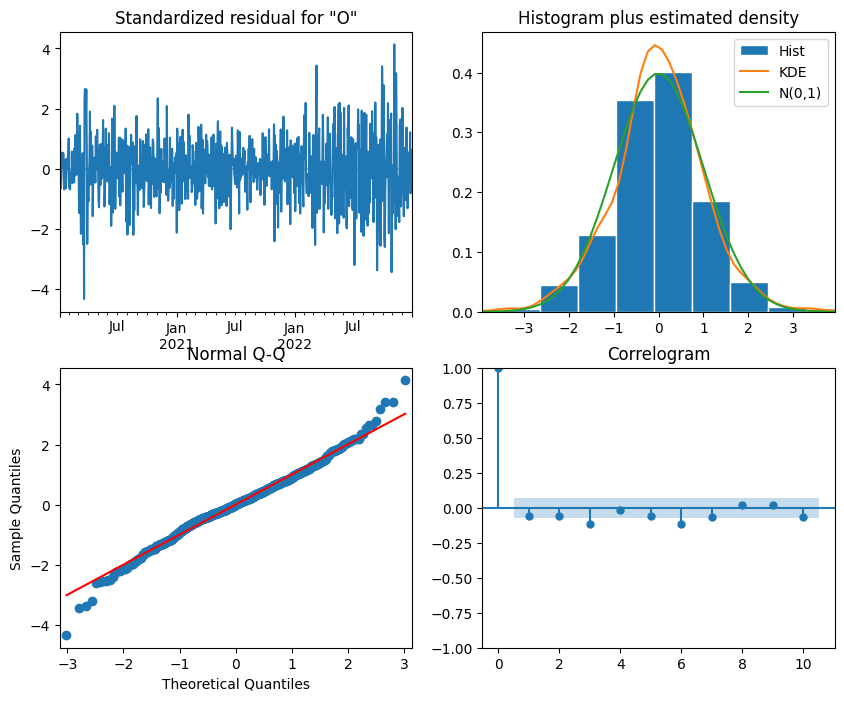

In [47]:
cur_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


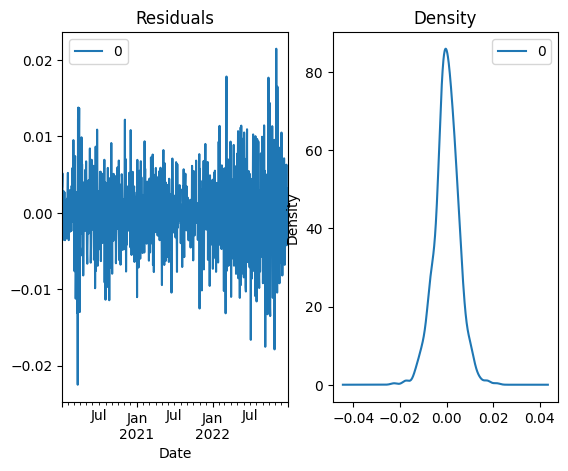

In [48]:
# Plot residual errors
residuals = pd.DataFrame(cur_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#Currency Model Predicting (Training Data)



In [49]:
# Get in-sample predictions
training_data_predictions = cur_model_fit.get_prediction(start=train_data_currency.dropna().index.min(),
                                                      end=train_data_currency.dropna().index.max(),
                                                      exog=train_data_oil['Original_Oil_Price_Pct_Change_diff'],
                                                      dynamic=False)

train_data_currency[['lower Cur predictions','Higher Cur predictions']] = training_data_predictions.conf_int()

# Create a new column for the predicted values
train_data_currency['Cur predictions'] = training_data_predictions.predicted_mean

train_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions
Date,,,,,,
2020-01-02,1.122083,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN,NaN,NaN,NaN
2020-01-06,1.116196,-0.000848,0.003553,-0.012544,0.012857,0.000156
2020-01-07,1.119799,0.003228,0.004077,-0.012325,0.010195,-0.001065
2020-01-08,1.115474,-0.003863,-0.007091,-0.014160,0.007191,-0.003484
...,...,...,...,...,...,...
2022-12-26,1.066780,0.006081,0.006717,-0.009712,0.010612,0.000450
2022-12-27,1.064022,-0.002586,-0.008666,-0.014557,0.005766,-0.004395
2022-12-28,1.063717,-0.000287,0.002298,-0.007179,0.013145,0.002983


#Currency Model Forecasting (Testing Data)

In [50]:
testing_data_forecast = cur_model_fit.get_forecast(steps=len(test_data_currency), alpha=0.05,exog=test_data_oil['Oil predictions'].dropna())


# Create a new dataframe to hold the forecast
test_data_currency[['lower Cur predictions','Higher Cur predictions']] = testing_data_forecast.conf_int()

# Create a new column for the forecasted values
test_data_currency['Cur predictions'] =  testing_data_forecast.predicted_mean



test_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions
Date,,,,,,
2023-01-02,1.070973,0.004594,0.001631,-0.012196,0.008128,-2.033942e-03
2023-01-03,1.067771,-0.002990,-0.007584,-0.012967,0.012407,-2.800715e-04
2023-01-04,1.054685,-0.012255,-0.009266,-0.012469,0.012915,2.229572e-04
2023-01-05,1.060637,0.005642,0.017898,-0.012842,0.012549,-1.468617e-04
2023-01-06,1.052222,-0.007934,-0.013576,-0.012639,0.012756,5.849613e-05
...,...,...,...,...,...,...
2023-06-27,1.091048,0.000349,0.005115,-0.012701,0.012700,-3.585352e-07
2023-06-28,1.095722,0.004284,0.003935,-0.012701,0.012700,-7.998642e-07
2023-06-29,1.091584,-0.003777,-0.008061,-0.012701,0.012700,-5.923533e-07


In [51]:
def Transform_OriginalValue(df,PredictedValue,Number_pct_change,original):
    initial_value = df[original][0]
    df['reversediff']=df[Number_pct_change].shift(1) + df[PredictedValue]
    initial_value = df[original][0]
    df.dropna(subset=[Number_pct_change], inplace=True)
    first_date = df.index[0]
    df.loc[df.index == first_date, 'reversediff'] = df.loc[df.index == first_date, Number_pct_change]
    df[original+'Predicted'] = (df['reversediff'] + 1).cumprod() * initial_value
    df = df.drop('reversediff', axis=1)



In [52]:
df_currency = pd.concat([train_data_currency, test_data_currency])
df_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions
Date,,,,,,
2020-01-02,1.122083,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN,NaN,NaN,NaN
2020-01-06,1.116196,-0.000848,0.003553,-0.012544,0.012857,0.000156
2020-01-07,1.119799,0.003228,0.004077,-0.012325,0.010195,-0.001065
2020-01-08,1.115474,-0.003863,-0.007091,-0.014160,0.007191,-0.003484


In [53]:
Transform_OriginalValue(df_currency,'Cur predictions','Original_USD_EUR_Price_Pct_Change','Original_USD_EUR_Price')

In [54]:
train_data_currency=df_currency[df_currency.index <= test_start_date]
train_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2020-01-03,1.117144,-0.004401,NaN,NaN,NaN,NaN,-0.004401,1.117144
2020-01-06,1.116196,-0.000848,0.003553,-0.012544,0.012857,0.000156,-0.004245,1.112401
2020-01-07,1.119799,0.003228,0.004077,-0.012325,0.010195,-0.001065,-0.001913,1.110273
2020-01-08,1.115474,-0.003863,-0.007091,-0.014160,0.007191,-0.003484,-0.000256,1.109989
2020-01-09,1.111321,-0.003723,0.000140,-0.007660,0.013262,0.002801,-0.001062,1.108810


In [55]:
test_data_currency=df_currency[df_currency.index >= test_start_date]
test_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2023-01-02,1.070973,0.004594,0.001631,-0.012196,0.008128,-0.002034,0.000930,1.057977
2023-01-03,1.067771,-0.002990,-0.007584,-0.012967,0.012407,-0.000280,0.004314,1.062541
2023-01-04,1.054685,-0.012255,-0.009266,-0.012469,0.012915,0.000223,-0.002767,1.059602
2023-01-05,1.060637,0.005642,0.017898,-0.012842,0.012549,-0.000147,-0.012402,1.046460
2023-01-06,1.052222,-0.007934,-0.013576,-0.012639,0.012756,0.000058,0.005701,1.052426


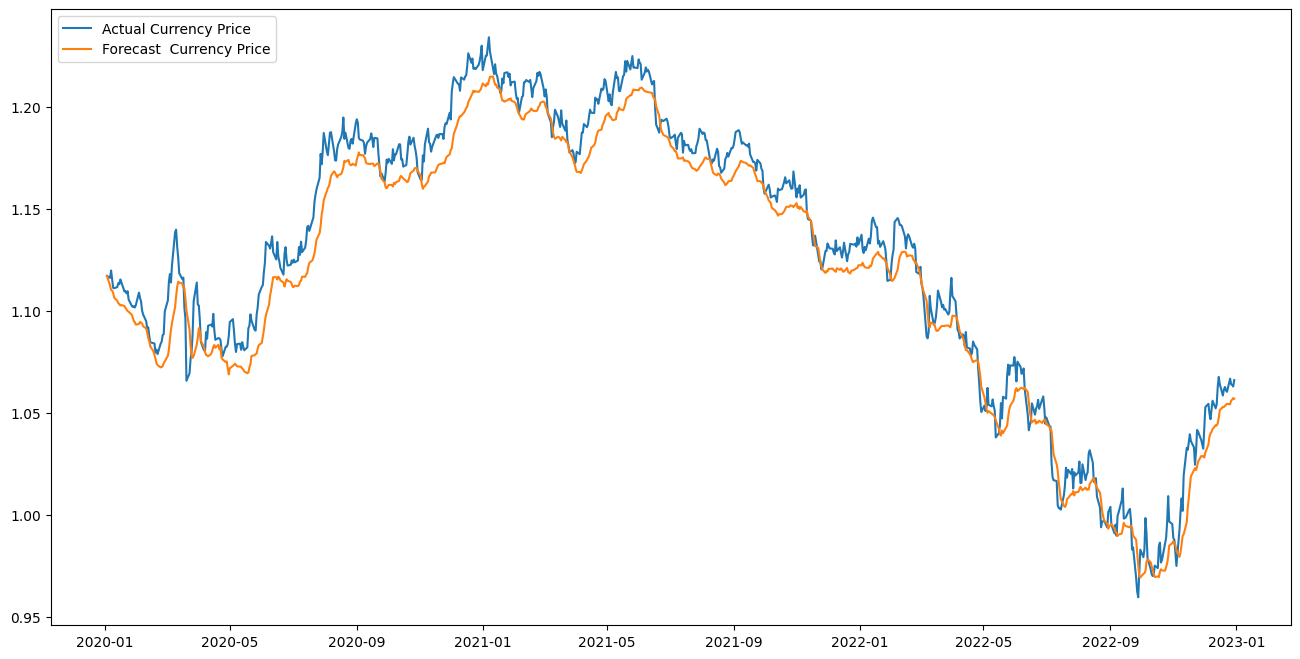

In [56]:
plt.figure(figsize=(16,8))
plt.plot(train_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(train_data_currency['Original_USD_EUR_PricePredicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")

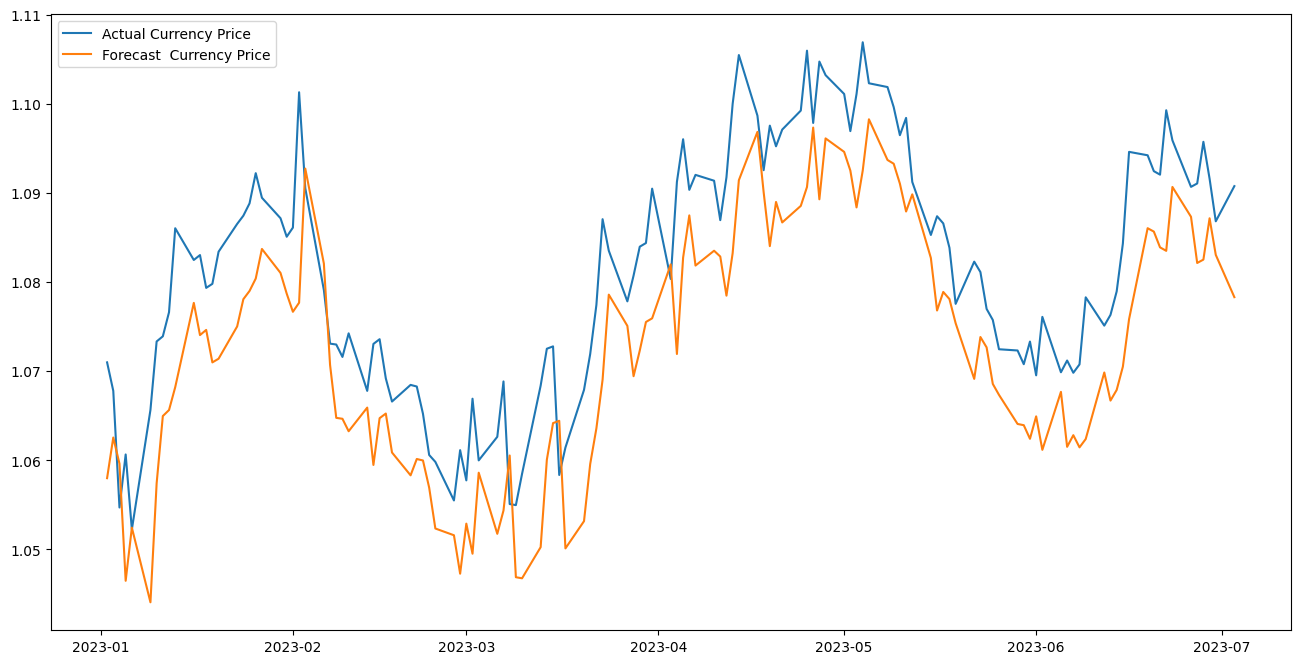

In [57]:
plt.figure(figsize=(16,8))
plt.plot(test_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(test_data_currency['Original_USD_EUR_PricePredicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Mean Absolute Error": mae, "Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [59]:
metrics = calculate_metrics(test_data_currency['Original_USD_EUR_Price'], test_data_currency['Original_USD_EUR_PricePredicted'])
metrics

{'Mean Absolute Error': 0.008969868899483866,
 'Mean Squared Error': 0.00010397767237148269,
 'Root Mean Squared Error': 0.010196944266371308,
 'Mean Absolute Percentage Error': 0.8288925400731071}